<a href="https://colab.research.google.com/github/AdriansaWP/Belajar-Machine-Learning/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

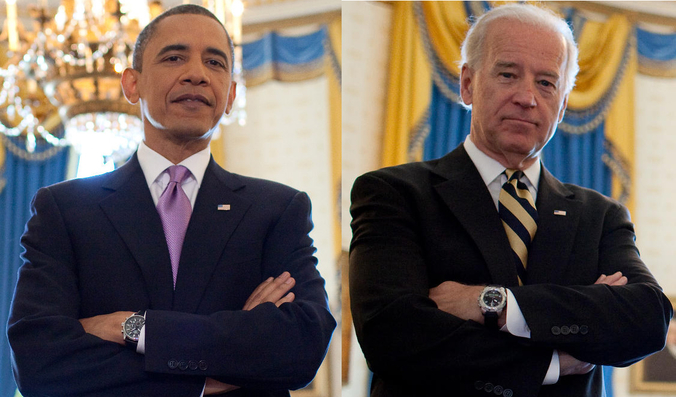

In [ ]:
#gunakan package PIL untuk melakukan modifikasi/menggambar overflay di Image
from PIL import Image, ImageDraw
from IPython.display import display

#Tampilkan image yang akan di deteksi wajahnya
pil_im = Image.open('two_people.jpg')
display(pil_im)

In [ ]:
#install package face_recognition
!pip install face_recognition

     |████████████████████████████████| 100.2MB 1.3MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=a8e7a5d2a71aea0847b3193231832b483b909a661e01d43766e8471ad341c72d
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
#import package
import face_recognition
import numpy as np

#mengenali sample training (Barack Obama dan Joe Biden)
gambar_obama = face_recognition.load_image_file("obama.jpg")
gambar_obama_encoding = face_recognition.face_encodings(gambar_obama)[0]

gambar_biden = face_recognition.load_image_file("biden.jpg")
gambar_biden_encoding = face_recognition.face_encodings(gambar_biden)[0]

#Buat array label training set
known_face_encodings = [
      gambar_obama_encoding,
      gambar_biden_encoding
]
known_face_names = [
      "Barack Obama",
      "Joe Biden"
]
print('Training encoding untuk ', len(known_face_encodings), ' images.')

Training encoding untuk  2  images.


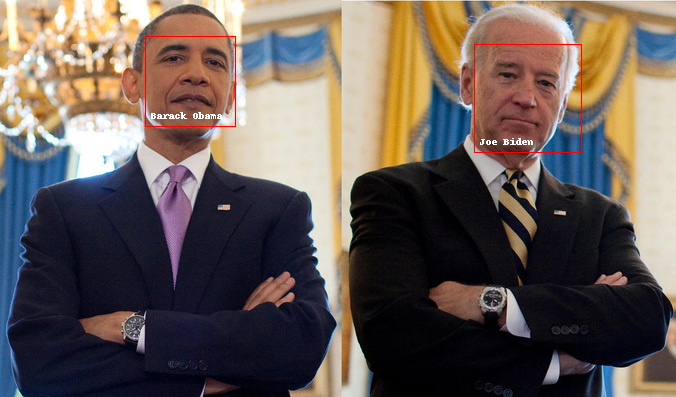

In [ ]:
#mengenali foto two_people
unknown_image = face_recognition.load_image_file("two_people.jpg")

#cari semua wajah di dalam gambar tersebut dan konversi menjadi encoding
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

#siapkan canvas untuk menggambar
pil_image = Image.fromarray(unknown_image) #kita memiliki array of image
draw = ImageDraw.Draw(pil_image) #gambar kedalam canvas

#kita memiliki lebih dari 1 wajah, loop semua wajah
for (top, right, bottom, left), face_encoding in zip (face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown"

  #gambar size wajah dapat berbeda-beda maka dari itu perkiraan seberapa jauh kemiripannya
  face_distance = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distance)
  if matches[best_match_index]:
    name = known_face_names[best_match_index] #known face names didefinisikan dari training

  #Gambarkan kotak wajah
  draw.rectangle(((left,top), (right,bottom)), outline=(255,0,0))
  
  #tuliskan namanya ke canvas kita
  text_width, text_height = draw.textsize(name)
  draw.text((left+6, bottom-text_height-5), name, fill=(255,255,255))

display(pil_image)